In [2]:
library(tidyverse)
library(topGO)
library(gprofiler2)
library(palmerpenguins)
library(ggthemes)

## [1.2.5 Exercises](https://r4ds.hadley.nz/data-visualize#exercises)

1. How many rows are in penguins? How many columns?

In [3]:
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


2. What does the bill_depth_mm variable in the penguins data frame describe? Read the help for ?penguins to find out.

In [4]:
?penguins

penguins            package:palmerpenguins             R Documentation

_S_i_z_e _m_e_a_s_u_r_e_m_e_n_t_s _f_o_r _a_d_u_l_t _f_o_r_a_g_i_n_g _p_e_n_g_u_i_n_s _n_e_a_r _P_a_l_m_e_r _S_t_a_t_i_o_n,
_A_n_t_a_r_c_t_i_c_a

_D_e_s_c_r_i_p_t_i_o_n:

     Includes measurements for penguin species, island in Palmer
     Archipelago, size (flipper length, body mass, bill dimensions),
     and sex. This is a subset of ‘penguins_raw’.

_U_s_a_g_e:

     penguins
     
_F_o_r_m_a_t:

     A tibble with 344 rows and 8 variables:

     species a factor denoting penguin species (Adélie, Chinstrap and
          Gentoo)

     island a factor denoting island in Palmer Archipelago, Antarctica
          (Biscoe, Dream or Torgersen)

     bill_length_mm a number denoting bill length (millimeters)

     bill_depth_mm a number denoting bill depth (millimeters)

     flipper_length_mm an integer denoting flipper length (mi

bill_depth_mm is the bill depth of the penguin in millimeters.

3. Make a scatterplot of bill_depth_mm vs. bill_length_mm. That is, make a scatterplot with bill_depth_mm on the y-axis and bill_length_mm on the x-axis. Describe the relationship between these two variables.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


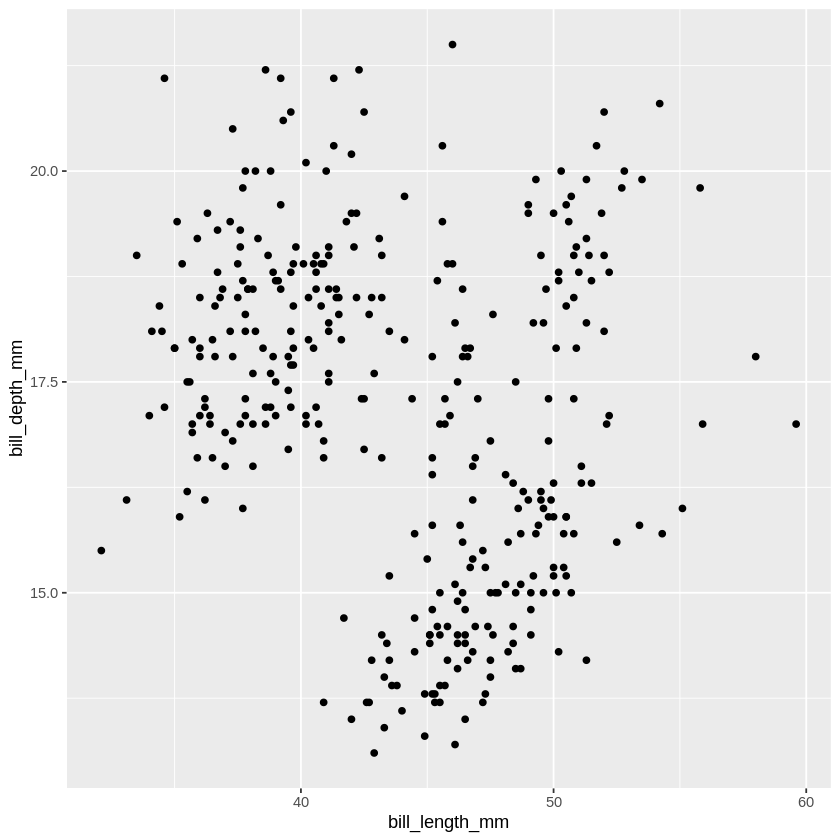

In [5]:
ggplot(
  data = penguins, mapping = aes(x = bill_length_mm, y = bill_depth_mm)) + 
  geom_point()

There is some clustering shown in the graph and in each cluster, as bill length increases, so does bill depth.

4. What happens if you make a scatterplot of species vs. bill_depth_mm? What might be a better choice of geom?

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


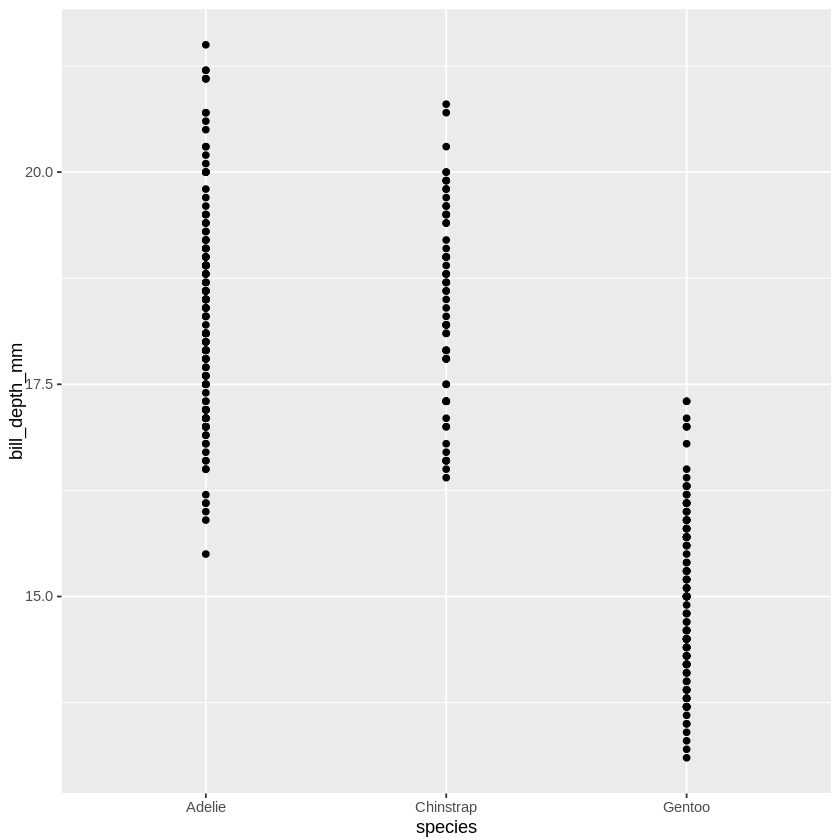

In [6]:
ggplot(
  data = penguins, mapping = aes(x = species, y = bill_depth_mm)) + 
  geom_point()

All points are on the species line on the x-axis. A better geom would be geom_boxplot().

5. Why does the following give an error and how would you fix it?
```r
ggplot(data = penguins) +   
  geom_point()
```

You don't know what the x and y axies are. You can fix this by adding mapping = aes() with whatever you to be x and y in the parentheses.

6. What does the na.rm argument do in geom_point()? What is the default value of the argument? Create a scatterplot where you successfully use this argument set to TRUE.

na.rm removes all missing values. The defualt of the argument is false.

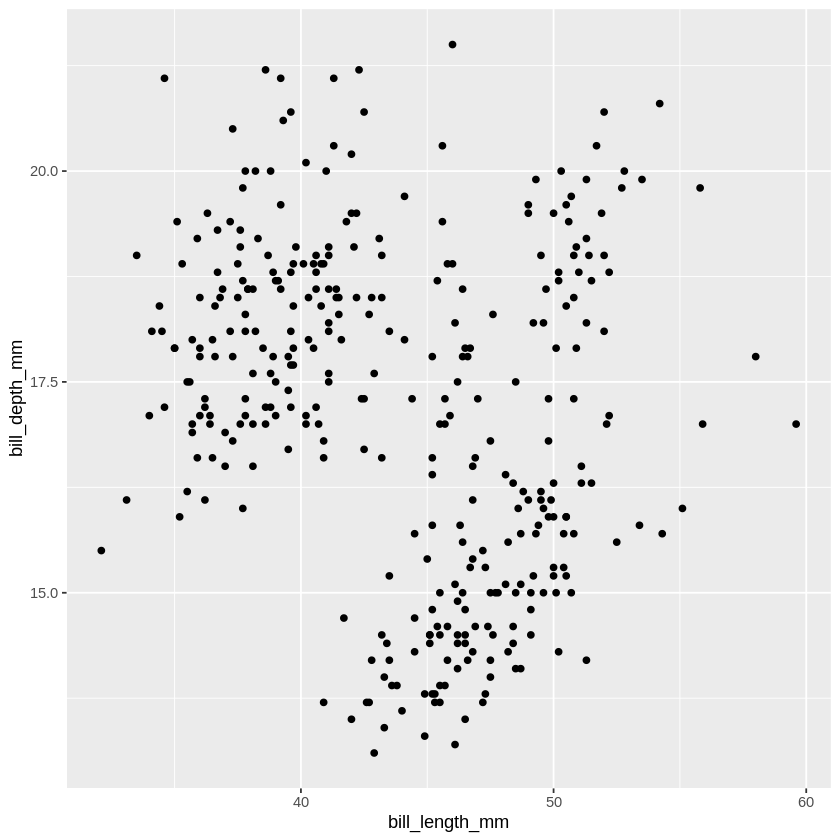

In [7]:
ggplot(
  data = penguins, mapping = aes(x = bill_length_mm, y = bill_depth_mm)) + 
  geom_point(na.rm= TRUE)

7. Add the following caption to the plot you made in the previous exercise: “Data come from the palmerpenguins package.” Hint: Take a look at the documentation for labs().

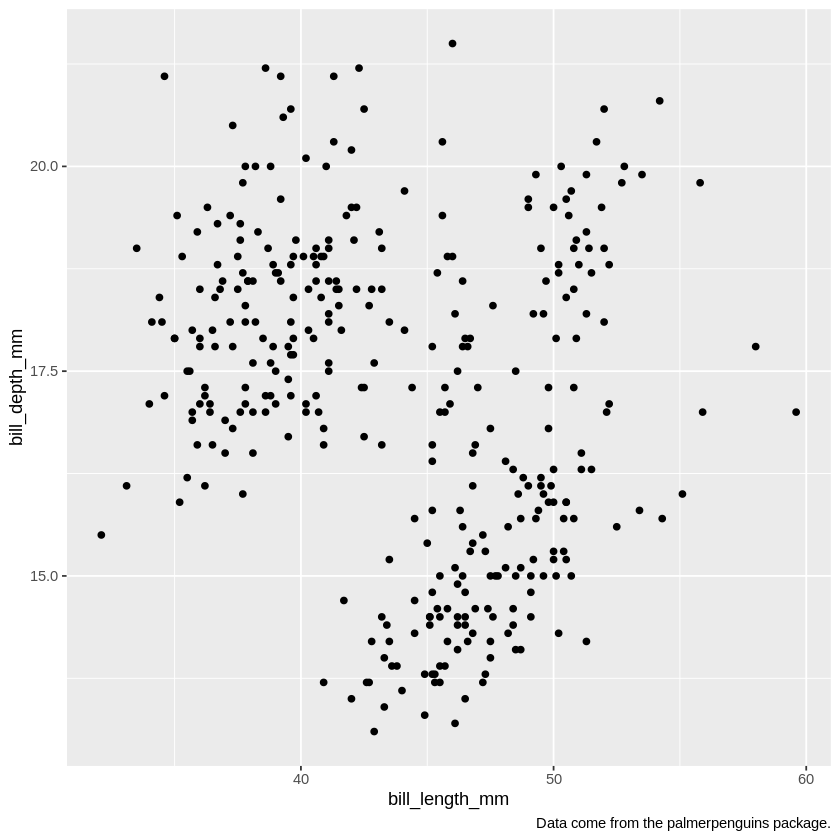

In [8]:
ggplot(
  data = penguins, mapping = aes(x = bill_length_mm, y = bill_depth_mm)) + 
  geom_point(na.rm = TRUE) + 
  labs(caption = "Data come from the palmerpenguins package.")

8. Recreate the following visualization. What aesthetic should bill_depth_mm be mapped to? And should it be mapped at the global level or at the geom level?  
<img src="https://r4ds.hadley.nz/data-visualize_files/figure-html/unnamed-chunk-17-1.png" width="400" height="300" />

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


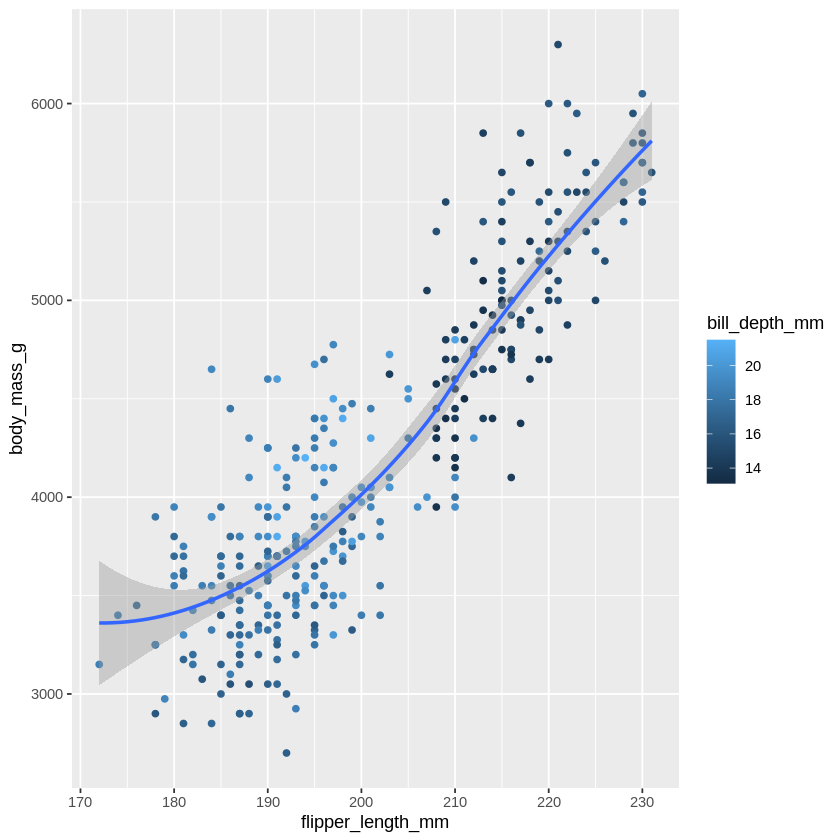

In [9]:
ggplot(
    data = penguins, mapping = aes(x = flipper_length_mm, y = body_mass_g, color = bill_depth_mm)) +
    geom_point(na.rm = TRUE) + 
    geom_smooth()

9. Run this code in your head and predict what the output will look like. Then, run the code in R and check your predictions.
```r
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = island)
) +
  geom_point() +
  geom_smooth(se = FALSE)
```

It will be a scatterplot with a line displaying the relationship between flipper length and body mass for each island.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


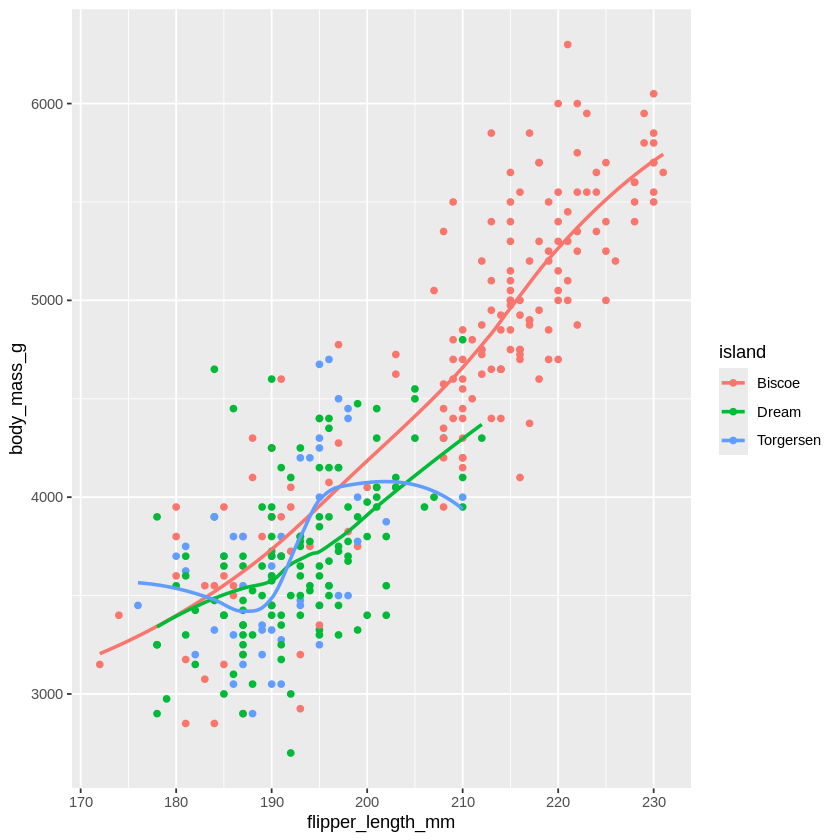

In [10]:
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g, color = island)
) +
  geom_point() +
  geom_smooth(se = FALSE)

My predictions were correct.

10. Will these two graphs look different? Why/why not?

```r
ggplot(
  data = penguins,
  mapping = aes(x = flipper_length_mm, y = body_mass_g)
) +
  geom_point() +
  geom_smooth()

ggplot() +
  geom_point(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
  ) +
  geom_smooth(
    data = penguins,
    mapping = aes(x = flipper_length_mm, y = body_mass_g)
  )
  ```

They will look the same because in the second one, while the mapping is in the geom, they are the same, so it is no different than just having the mapping in the ggplot.

## [1.4.3 Exercises](https://r4ds.hadley.nz/data-visualize#exercises-1)

1. Make a bar plot of species of penguins, where you assign species to the y aesthetic. How is this plot different?

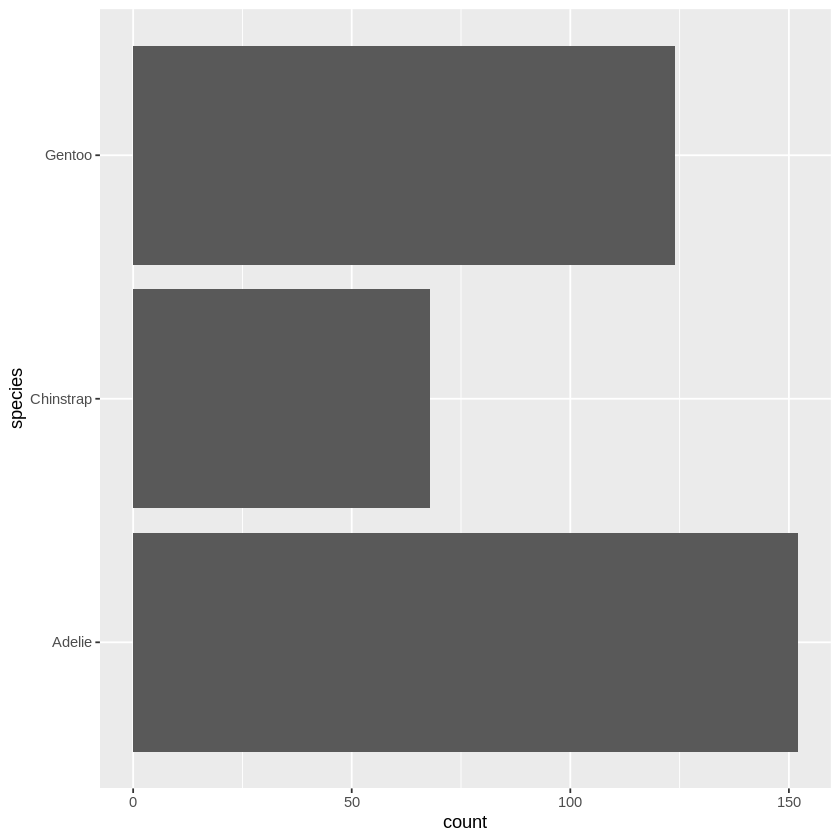

In [11]:
ggplot(penguins, aes(y=species)) +
    geom_bar()

This plot is switched in that the count is now on the x-axis instead of the y-axis.

2. How are the following two plots different? Which aesthetic, color or fill, is more useful for changing the color of bars?
```r
ggplot(penguins, aes(x = species)) +
  geom_bar(color = "red")

ggplot(penguins, aes(x = species)) +
  geom_bar(fill = "red")
```

Color only outlines the bars, while fill colors them in entirely. Fill is more useful for changing the color of bars

3. What does the bins argument in geom_histogram() do?

It determines the number of bins in your plot.

4. Make a histogram of the carat variable in the diamonds dataset that is available when you load the tidyverse package. Experiment with different binwidths. What binwidth reveals the most interesting patterns?

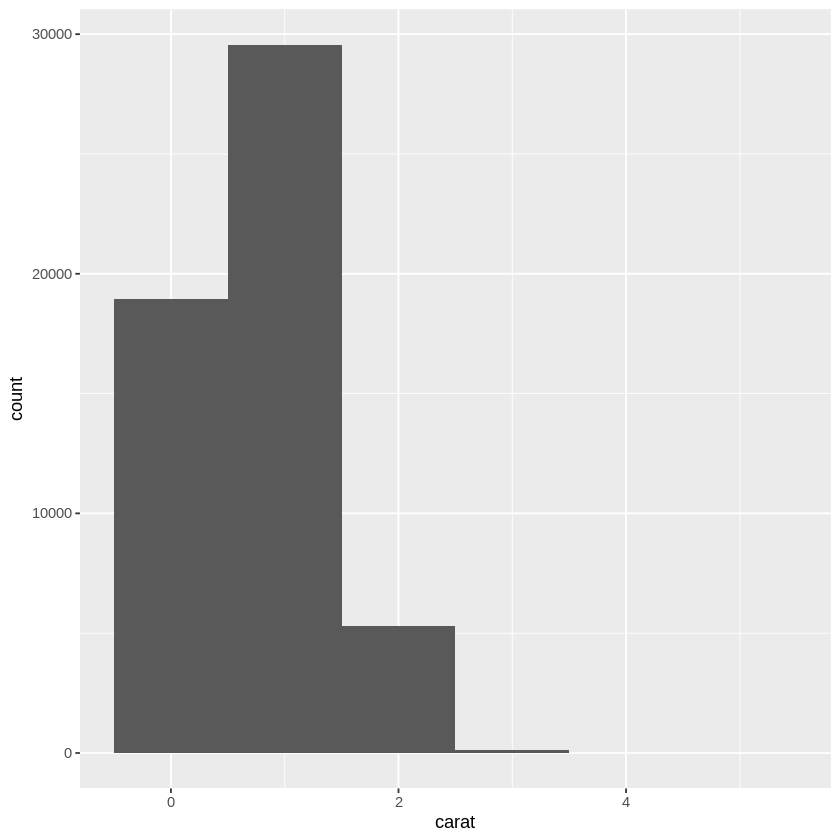

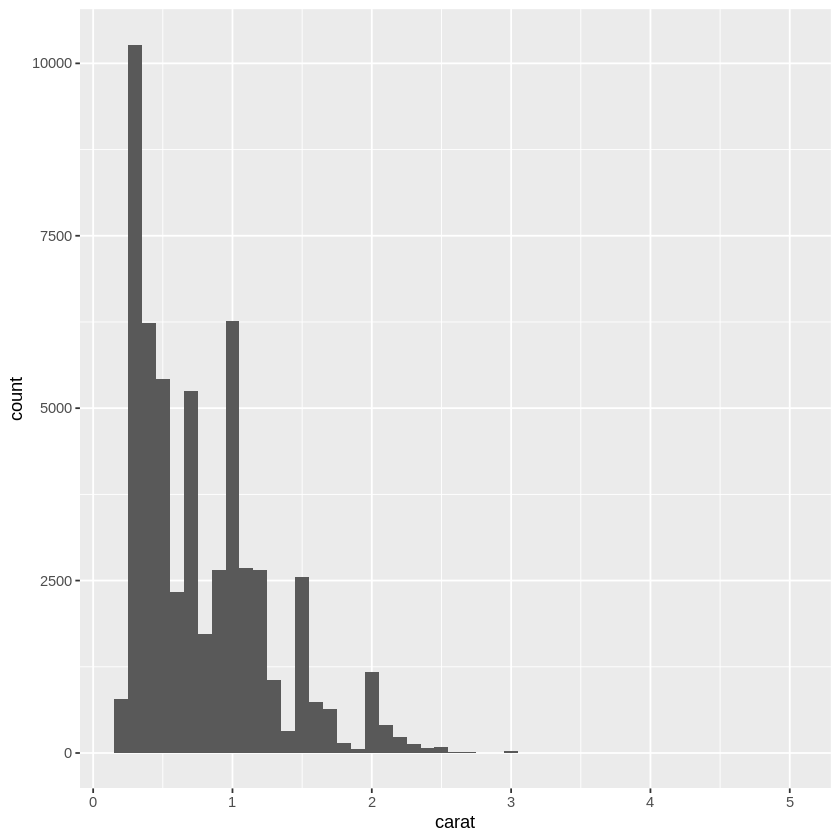

In [12]:
ggplot(diamonds, aes(x = carat)) +
    geom_histogram(binwidth=1)
ggplot(diamonds, aes(x = carat)) +
    geom_histogram(binwidth=0.1)

I think that since the carat variable only goes to about 3, a very small binwidth size is better.

## [1.5.5 Exercises](https://r4ds.hadley.nz/data-visualize#exercises-2)

1. The mpg data frame that is bundled with the ggplot2 package contains 234 observations collected by the US Environmental Protection Agency on 38 car models. Which variables in mpg are categorical? Which variables are numerical? (Hint: Type ?mpg to read the documentation for the dataset.) How can you see this information when you run mpg?

In [13]:
?mpg
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


mpg                  package:ggplot2                   R Documentation

_F_u_e_l _e_c_o_n_o_m_y _d_a_t_a _f_r_o_m _1_9_9_9 _t_o _2_0_0_8 _f_o_r _3_8 _p_o_p_u_l_a_r _m_o_d_e_l_s _o_f _c_a_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     This dataset contains a subset of the fuel economy data that the
     EPA makes available on <https://fueleconomy.gov/>. It contains
     only models which had a new release every year between 1999 and
     2008 - this was used as a proxy for the popularity of the car.

_U_s_a_g_e:

     mpg
     
_F_o_r_m_a_t:

     A data frame with 234 rows and 11 variables:

     manufacturer manufacturer name

     model model name

     displ engine displacement, in litres

     year year of manufacture

     cyl number of cylinders

     trans type of transmission

     drv the type of drive train, where f = front-wheel drive, r = rear
          wheel drive, 4 = 4wd

     cty city miles per gallon

     

Manufacturer, model, trans, drv, fl, and class are categorical. Displ, year, cyl, cty, and hwy are numerical. When you run mpg the type of data is listed under the name of the column.

2. Make a scatterplot of hwy vs. displ using the mpg data frame. Next, map a third, numerical variable to color, then size, then both color and size, then shape. How do these aesthetics behave differently for categorical vs. numerical variables?

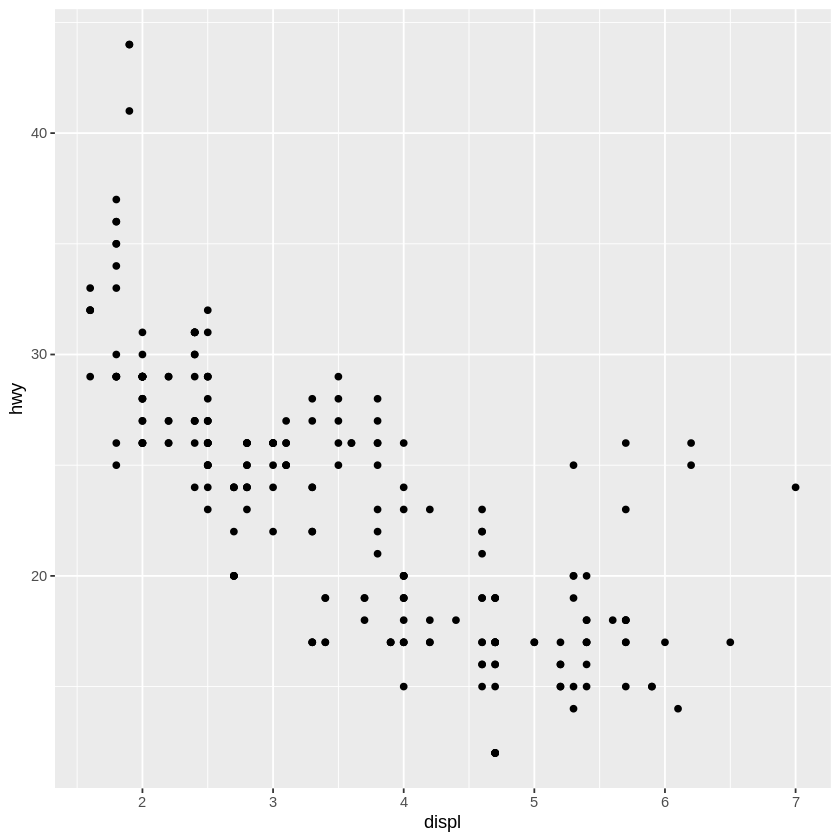

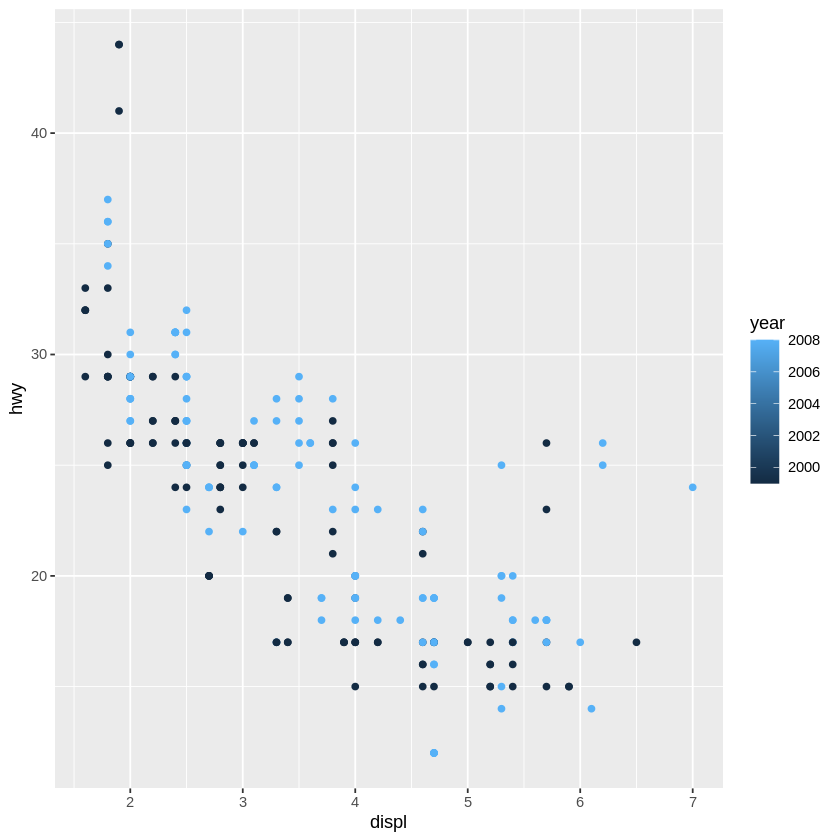

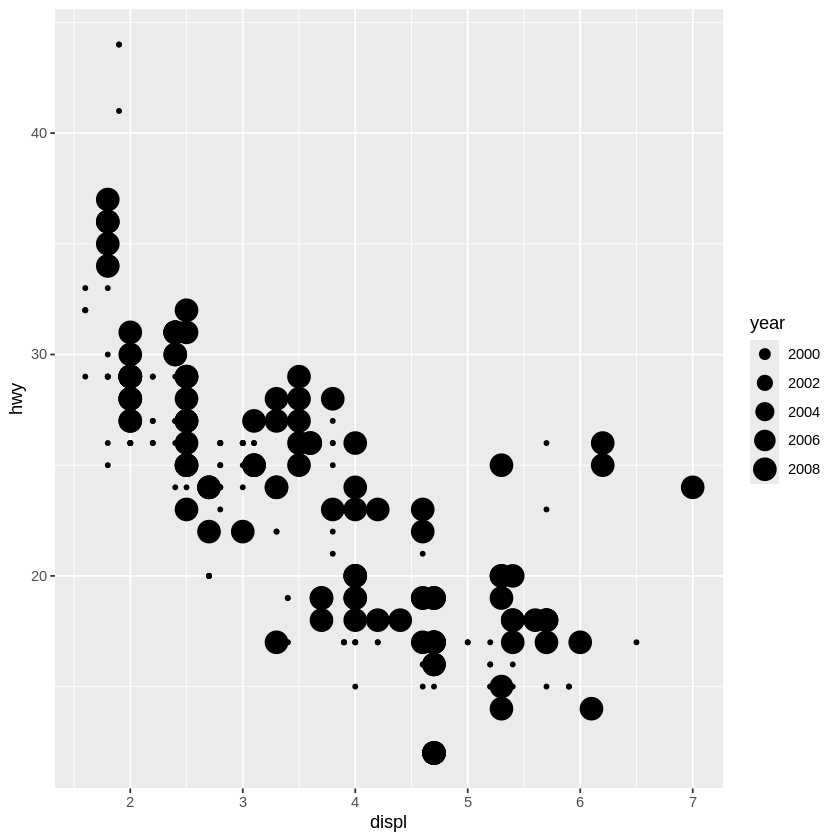

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `scale_f()`:
! A continuous variable cannot be mapped to the shape aesthetic.
ℹ Choose a different aesthetic or use `scale_shape_binned()`.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .  

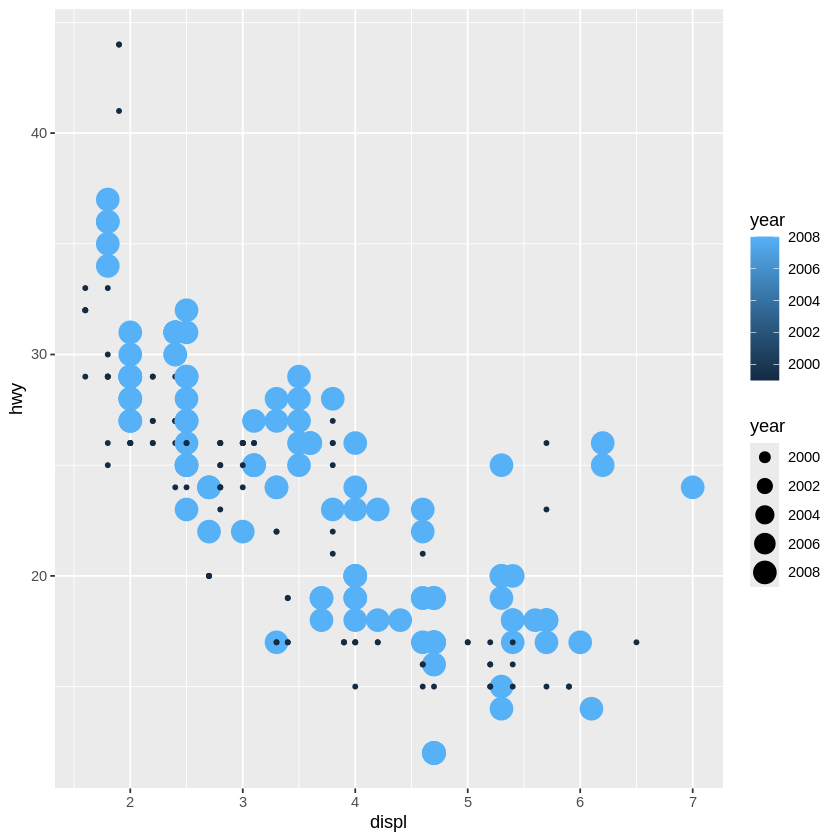

In [14]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point()

ggplot(mpg, aes(x = displ, y = hwy, color = year)) +
    geom_point()

ggplot(mpg, aes(x = displ, y = hwy, size = year)) +
    geom_point()

ggplot(mpg, aes(x = displ, y = hwy, color = year, size = year)) +
    geom_point()

ggplot(mpg, aes(x = displ, y = hwy, shape = year)) +
    geom_point()

Since year is a continuous variable, it cannot be mapped to shape. It works fine when you map it to shape or size.

3. In the scatterplot of hwy vs. displ, what happens if you map a third variable to linewidth?

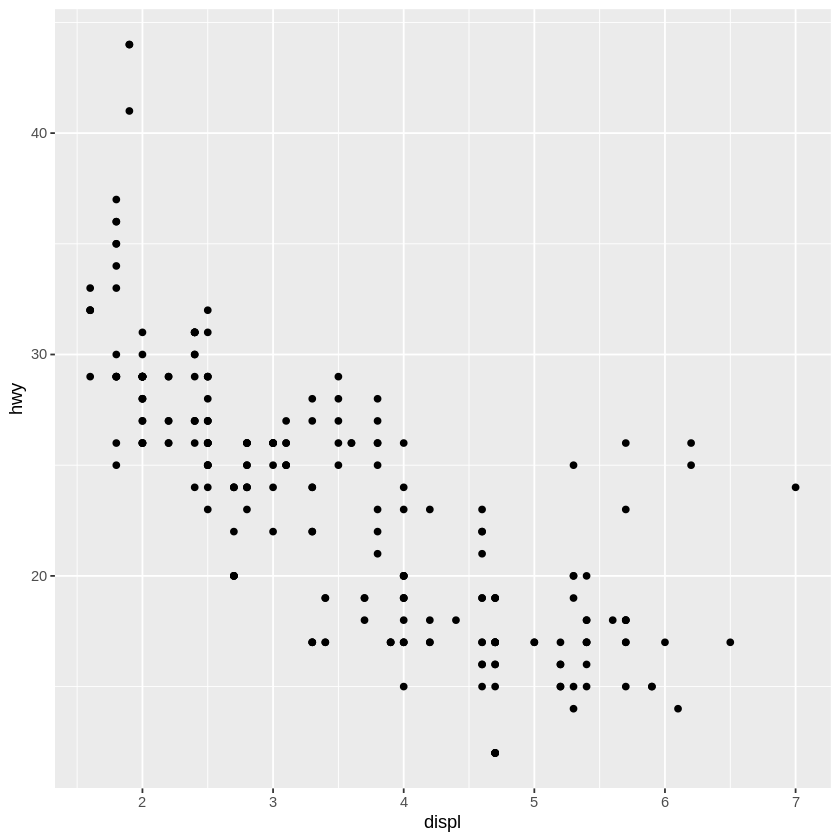

In [15]:
ggplot(mpg, aes(x = displ, y = hwy, linewidth = year)) +
    geom_point()

It has no error, but it doesn't really work as there is no line to determine the width of.

4. What happens if you map the same variable to multiple aesthetics?

Both aesthetics are shown. This can be helpful for colorblindness by using both color and shape for a variable.

5. Make a scatterplot of bill_depth_mm vs. bill_length_mm and color the points by species. What does adding coloring by species reveal about the relationship between these two variables? What about faceting by species?

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


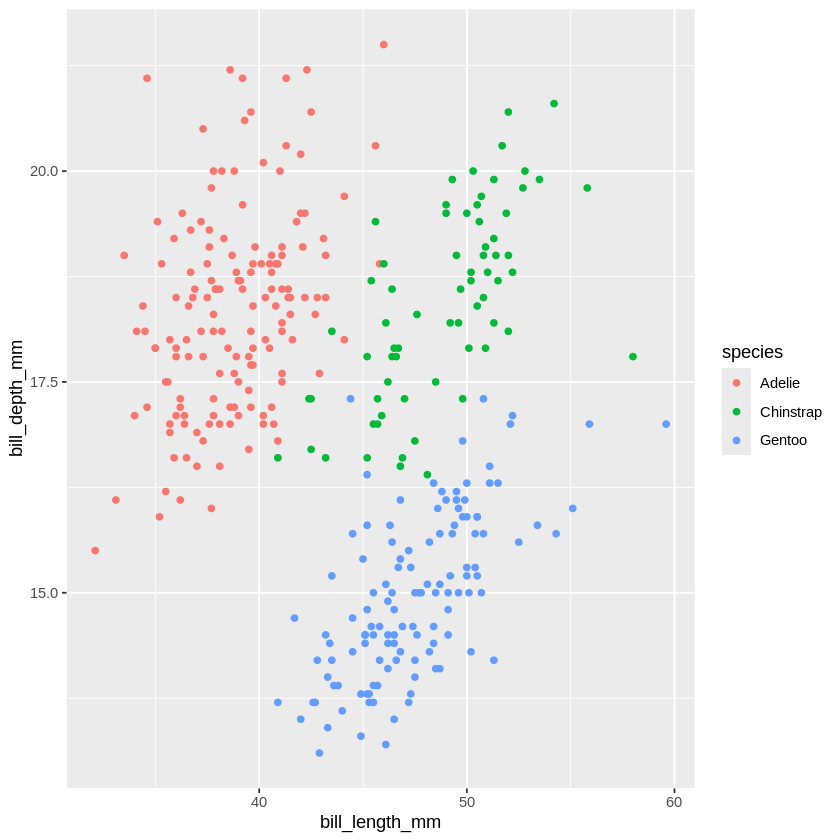

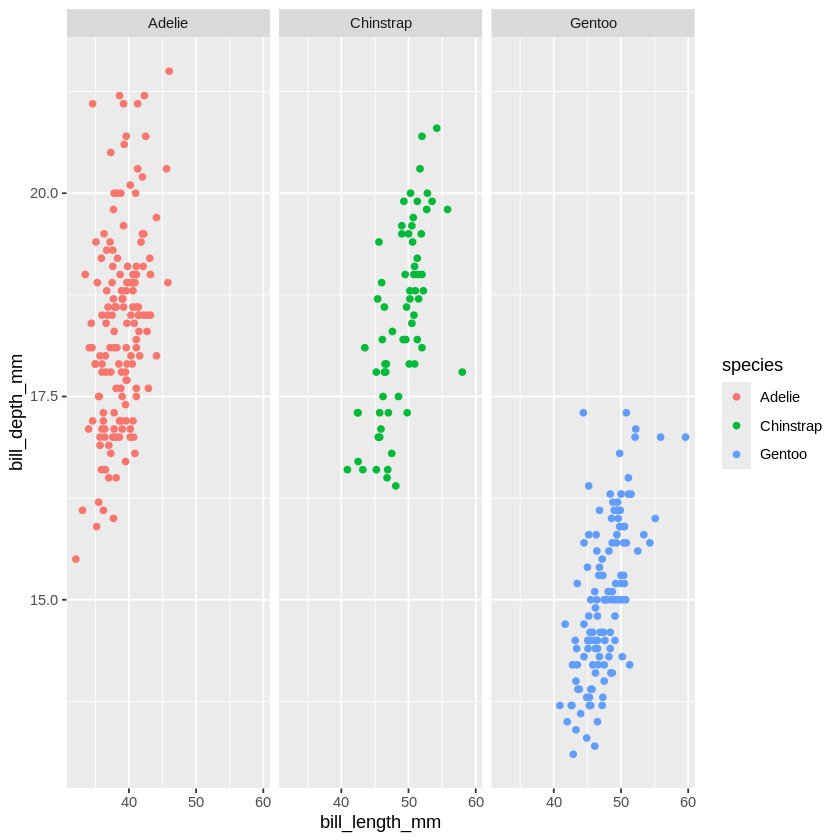

In [16]:
ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm, color = species)) +
    geom_point()

ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm, color = species)) +
    geom_point() +
    facet_wrap(~species)

It shows that the species are in separate clusters. When faceting by species, each group gets its own plot, so you can cleary see the trends of each cluster separately.

6. Why does the following yield two separate legends? How would you fix it to combine the two legends?
```r
ggplot(
  data = penguins,
  mapping = aes(
    x = bill_length_mm, y = bill_depth_mm, 
    color = species, shape = species
  )
) +
  geom_point() +
  labs(color = "Species")
```

The labs(color = "Species") line separates the legend by color and shape. To combine them, remove that line.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


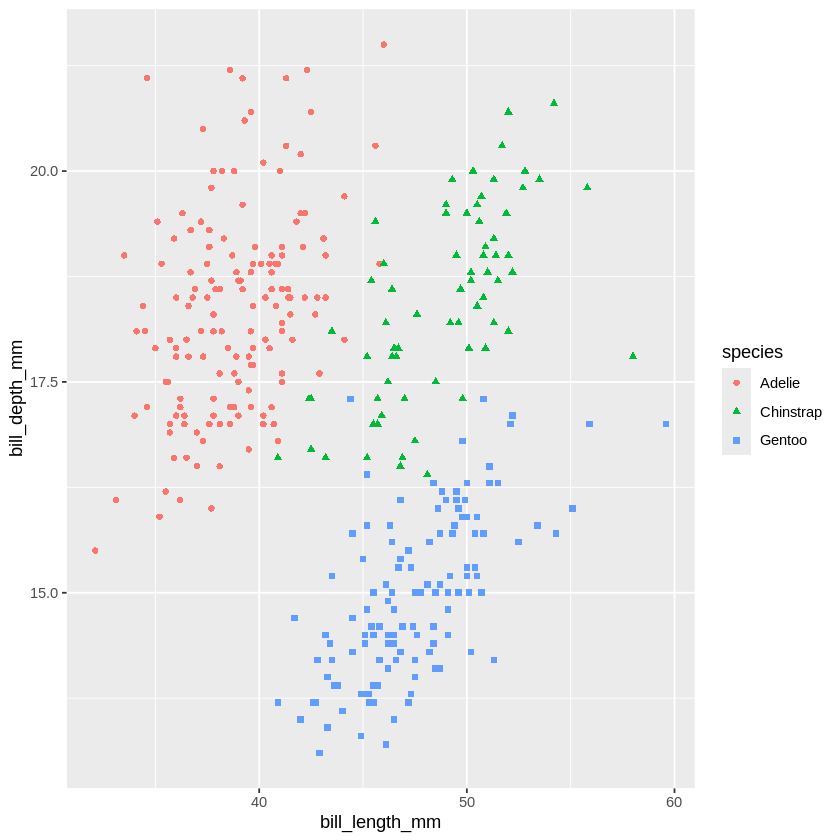

In [17]:
ggplot(
  data = penguins,
  mapping = aes(
    x = bill_length_mm, y = bill_depth_mm, 
    color = species, shape = species
  )
) +
  geom_point()

7. Create the two following stacked bar plots. Which question can you answer with the first one? Which question can you answer with the second one?
```r
ggplot(penguins, aes(x = island, fill = species)) +
  geom_bar(position = "fill")
ggplot(penguins, aes(x = species, fill = island)) +
  geom_bar(position = "fill")
```

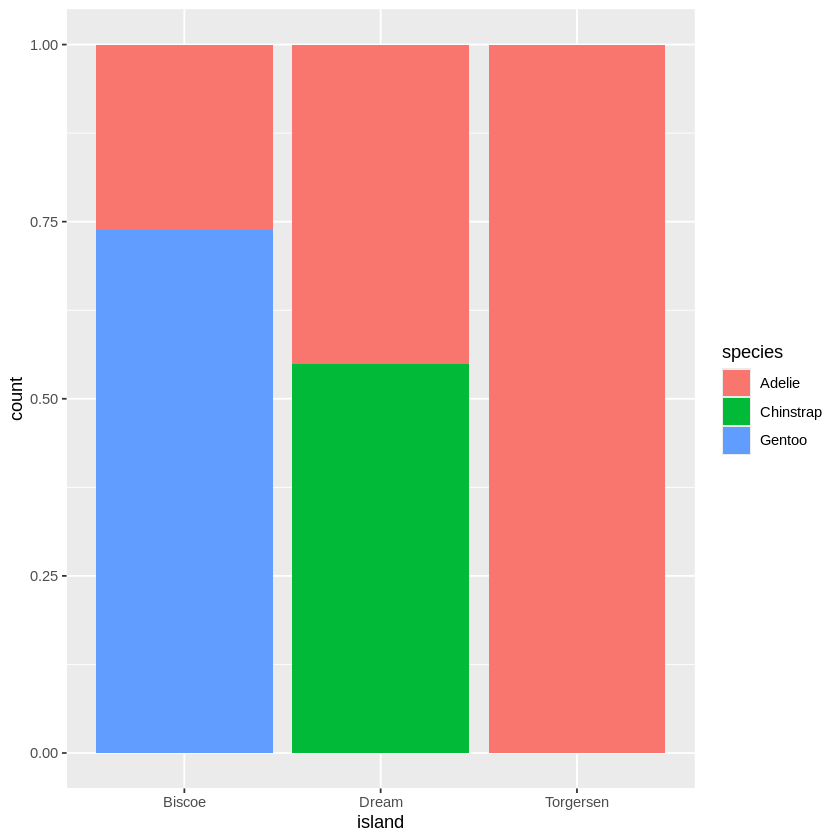

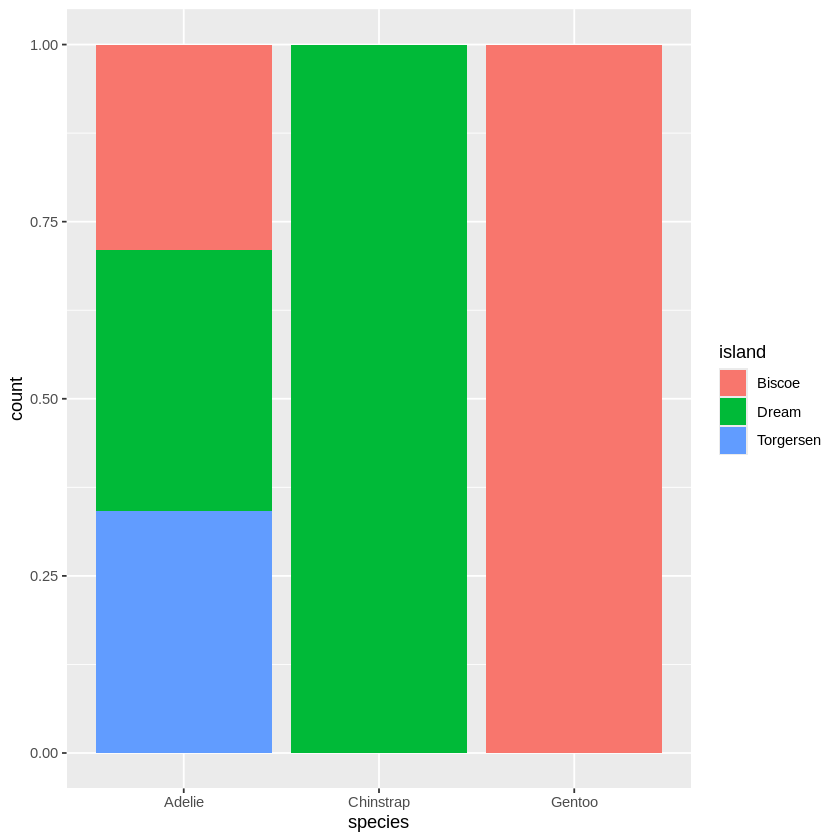

In [18]:
ggplot(penguins, aes(x = island, fill = species)) +
  geom_bar(position = "fill")
ggplot(penguins, aes(x = species, fill = island)) +
  geom_bar(position = "fill")

The first plot answers the makeup of species on each island. The second plot answers what island(s) are inhabited by each species.

## [1.6.1 Exercises](https://r4ds.hadley.nz/data-visualize#exercises-3)

1. Run the following lines of code. Which of the two plots is saved as mpg-plot.png? Why?
```r
ggplot(mpg, aes(x = class)) +
  geom_bar()
ggplot(mpg, aes(x = cty, y = hwy)) +
  geom_point()
ggsave("mpg-plot.png")
```

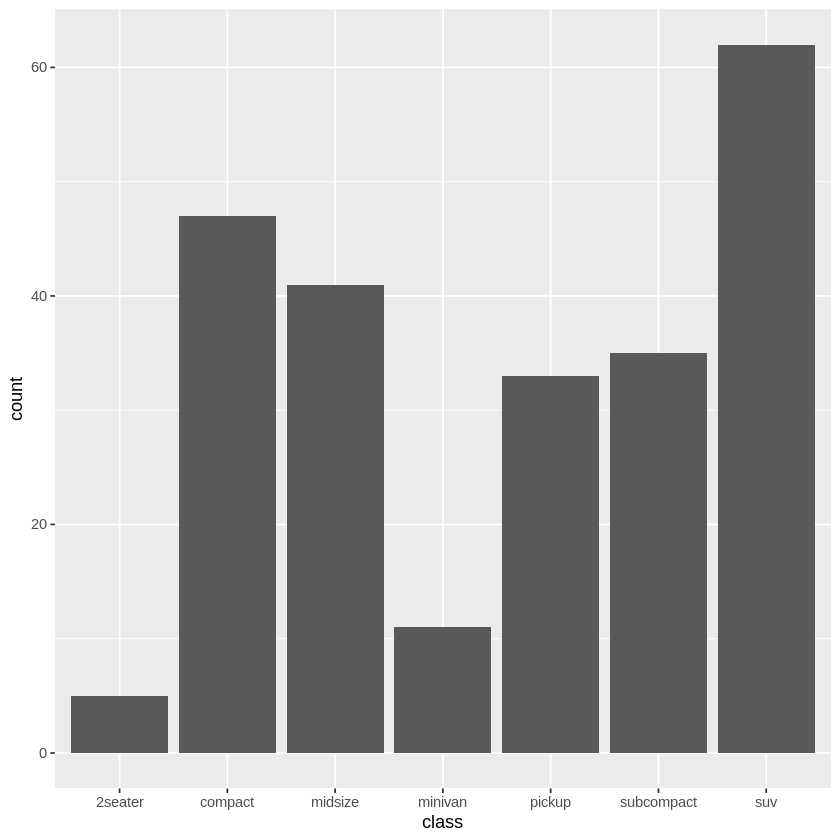

Saving 6.67 x 6.67 in image


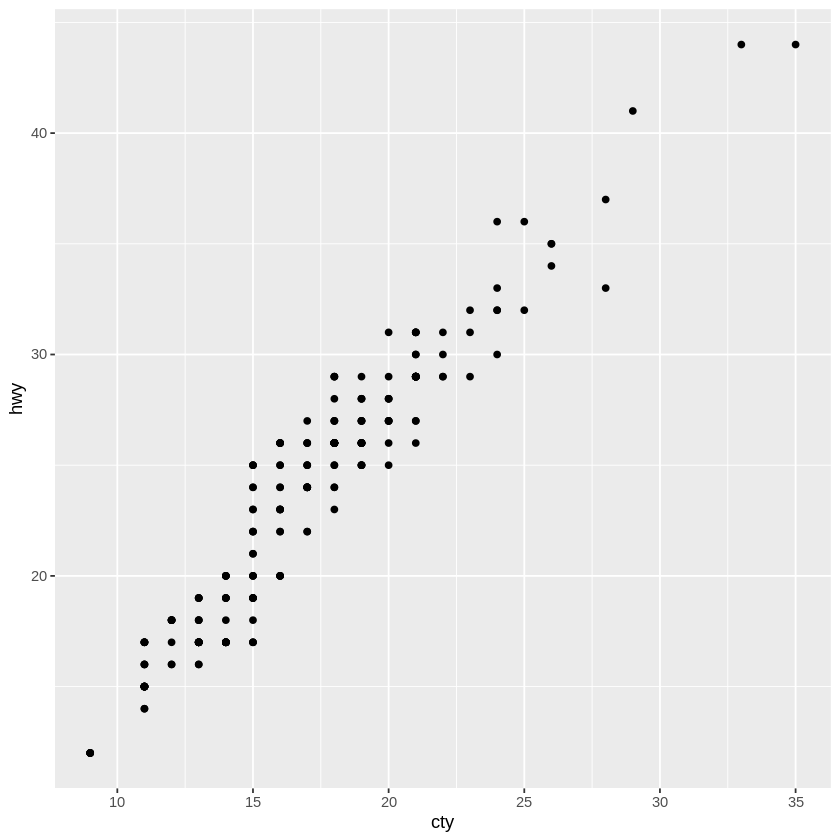

In [19]:
ggplot(mpg, aes(x = class)) +
  geom_bar()
ggplot(mpg, aes(x = cty, y = hwy)) +
  geom_point()
ggsave("mpg-plot.png")

The second one is saved since that was the most recent plot made once the save line was run.

2. What do you need to change in the code above to save the plot as a PDF instead of a PNG? How could you find out what types of image files would work in ggsave()?

To change the file type, change the .png to .pdf or use the device = pdf argument. You can see what filetypes will work by going to the documentation for ggsave().

## [2.5 Exercises](https://r4ds.hadley.nz/workflow-basics#exercises)

1. Why does this code not work?
```r
my_variable <- 10
my_varıable
#> Error: object 'my_varıable' not found
```
Look carefully! (This may seem like an exercise in pointlessness, but training your brain to notice even the tiniest difference will pay off when programming.)

There is a 'ı' instead of an 'i'.

2. Tweak each of the following R commands so that they run correctly:
```r
libary(todyverse)

ggplot(dTA = mpg) + 
  geom_point(maping = aes(x = displ y = hwy)) +
  geom_smooth(method = "lm)
```

`geom_smooth()` using formula = 'y ~ x'


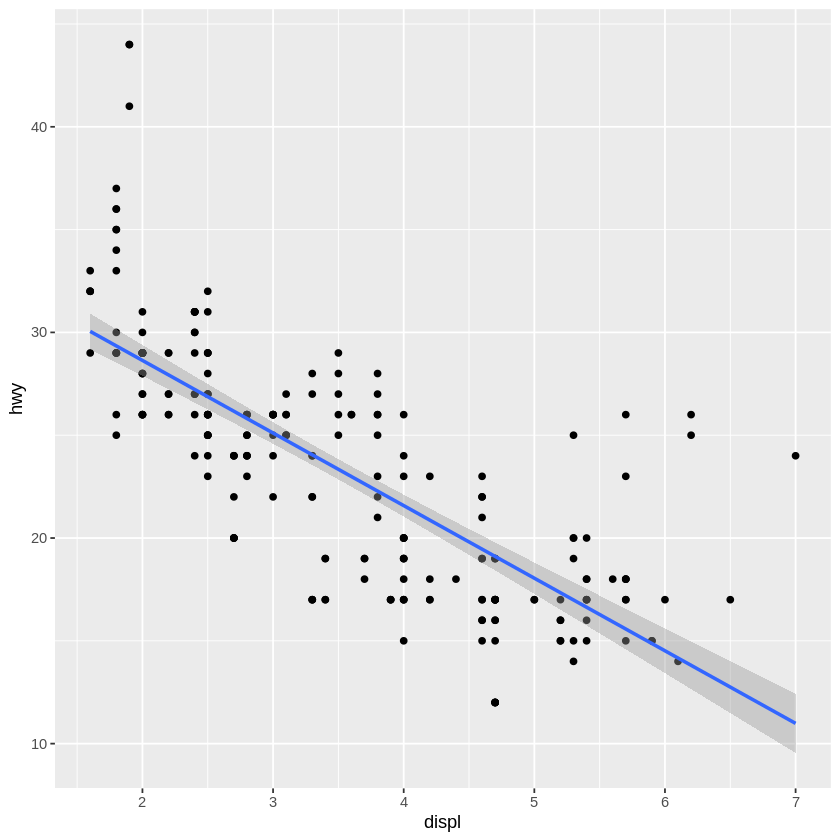

In [20]:
library(tidyverse) # Added first r in library and changed o to i

ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + # changed dTA to data, added comma between arguments, and adding second p to mapping
  geom_point() + # moved mapping to previous line
  geom_smooth(method = "lm") # Added second "

3. Press Option + Shift + K / Alt + Shift + K. What happens? How can you get to the same place using the menus?

It does nothing here, but in Rstudio, it opens the keyboard shortcuts quick reference. Using menus, click help at the top of the page and it is one of the options listed there.

4. Let’s revisit an exercise from the Section 1.6. Run the following lines of code. Which of the two plots is saved as mpg-plot.png? Why?
```r
my_bar_plot <- ggplot(mpg, aes(x = class)) +
  geom_bar()
my_scatter_plot <- ggplot(mpg, aes(x = cty, y = hwy)) +
  geom_point()
ggsave(filename = "mpg-plot.png", plot = my_bar_plot)
```

In [21]:
my_bar_plot <- ggplot(mpg, aes(x = class)) +
  geom_bar()
my_scatter_plot <- ggplot(mpg, aes(x = cty, y = hwy)) +
  geom_point()
ggsave(filename = "mpg-plot.png", plot = my_bar_plot)

Saving 6.67 x 6.67 in image


It now saves the bar plot because we assigned each plot a name and then told ggsave to save the one called my_bar_plot, which is the first plot.